# Data Analysis for Carnage

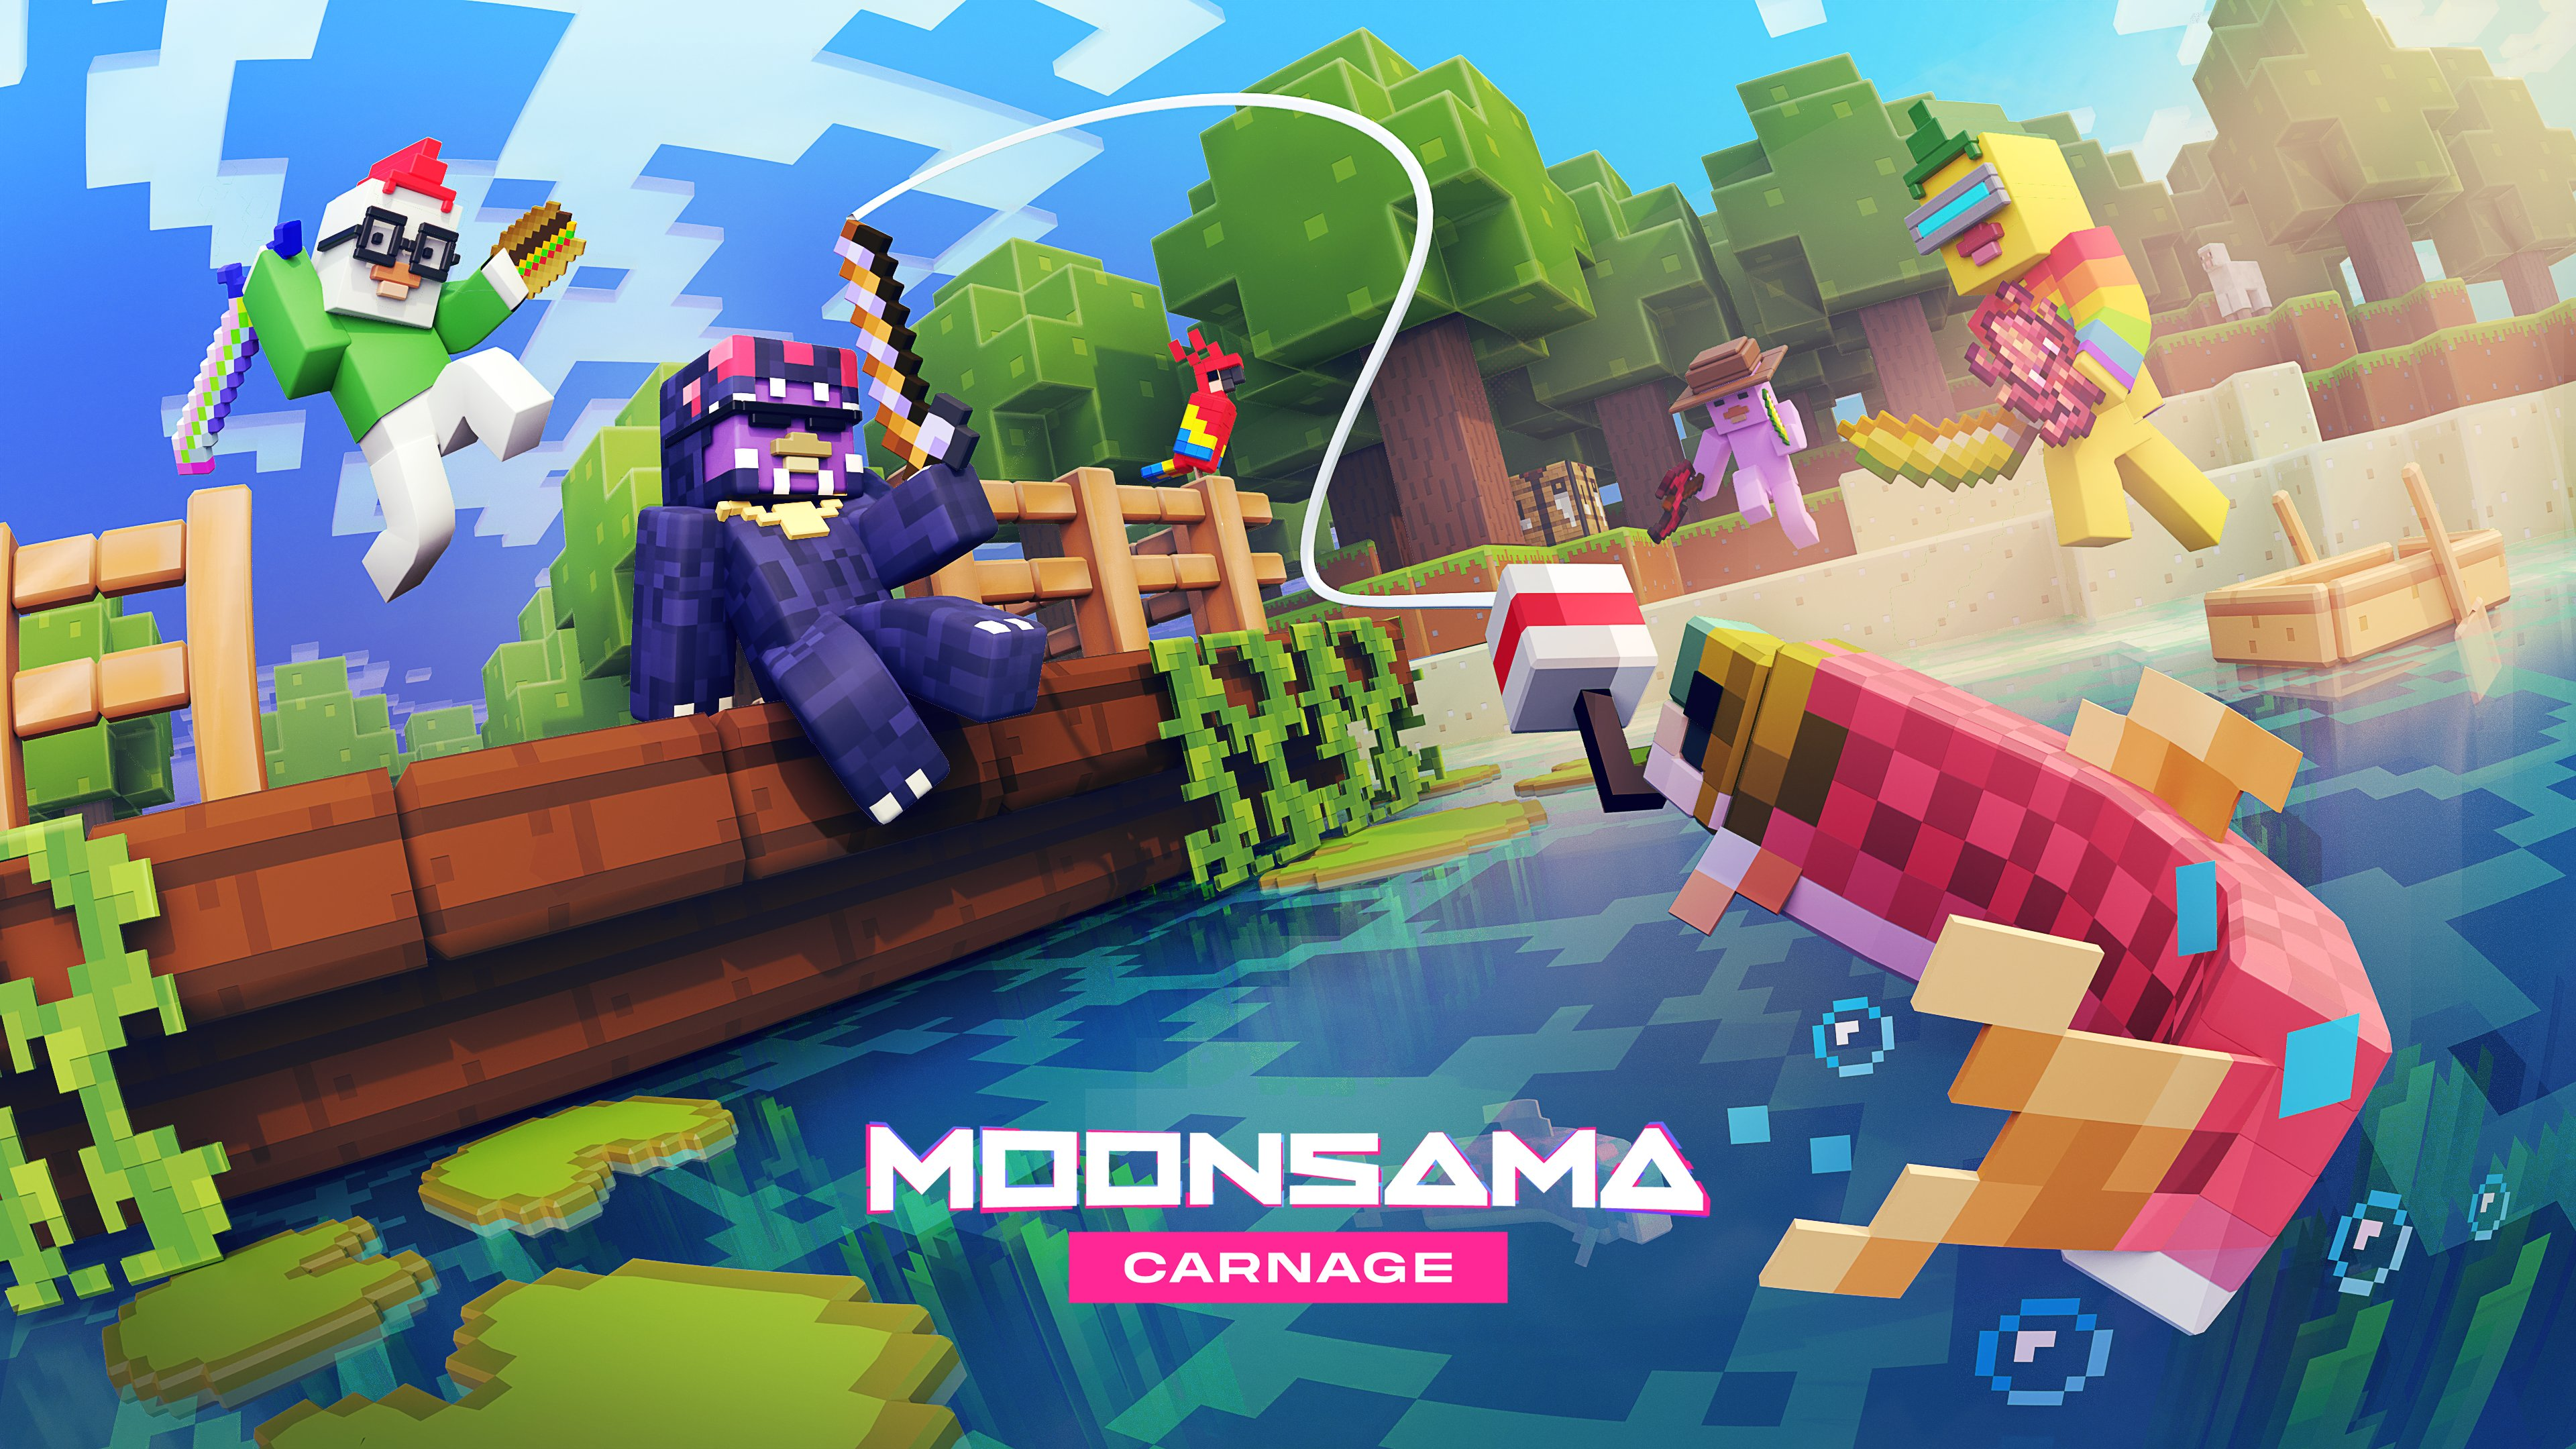

## Brief Introduction About Moonsama




## Roadmap


1. Gathering data

2. Building the dataset

3. Checking the dataset

4. Performing Exploratory Data Analysis
    
    a. General Aspects of Carnage
        - # of players, # of players in each carnage, # of new players in each carnage
        - # of session of each player 
        - Total # of mined resources (final view)
        - Total # of obtained resources without gganbu (personal view)
        - Gganbu in each carnage
    b. Going deeper into the player's analysis
        - Performance in the game
        - Moonsamas/VIP tickets or passes
        - Can we clasify players into groups? (noob/safe mining/butcher)
    c. Deeper analysis of resources considering external events
        - How did the events condition behaviors within mining?
    d. Effects of having a no-reward session
    
5. Wrapping up all the information

6. Thanks

## 1. Gathering data

### Set-up

In [16]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
%matplotlib inline

### Reading JSON files

In [17]:
format_data = '%d/%m/%Y'
path_to_json = './personal_view/'
path_to_json2 = './final_view/'

json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
json_files2 = [pos_json for pos_json in os.listdir(path_to_json2) if pos_json.endswith('.json')]

In [21]:
# Checking files
json_files

['017_carnage_pv.json',
 '018_carnage_pv.json',
 '019_carnage_pv.json',
 '020_carnage_pv.json',
 '021_carnage_pv.json',
 '022_carnage_pv.json',
 '023_carnage_pv.json',
 '024_carnage_pv.json',
 '025_carnage_pv.json',
 '026_carnage_pv.json',
 '027_carnage_pv.json',
 '028_carnage_pv.json',
 '029_carnage_pv.json',
 '030_carnage_pv.json',
 '031_carnage_pv.json']

## 2. Building the dataset

### Creating dictionaries to store JSONs

In [3]:
# for personal view
d = {}
for name in json_files:
    d[name] = pd.DataFrame()

# for final view    
d2 = {}
for name in json_files2:
    d2[name] = pd.DataFrame()

In [4]:
# filling out dictionaries

sundays = ['17/04/2022','24/04/2022','01/05/2022','08/05/2022','15/05/2022','22/05/2022'
           ,'29/05/2022','05/06/2022','12/06/2022','19/06/2022','26/06/2022','03/07/2022','10/07/2022','17/07/2022','24/07/2022']

weeks = list(range(17,17+len(sundays)))


for i in range(0,len(json_files)):
    d[json_files[i]] = pd.read_json(path_to_json+json_files[i]).T
    d[json_files[i]] = d[json_files[i]][0].apply(pd.Series, dtype='float64')
    d[json_files[i]] = d[json_files[i]].reset_index()
    d[json_files[i]]['date'] = datetime.strptime(sundays[i], format_data)
    d[json_files[i]]['week_n'] = weeks[i]

for i in range(0,len(json_files2)):
    d2[json_files2[i]] = pd.read_json(json_files2[i]).T
    d2[json_files2[i]] = d2[json_files2[i]][0].apply(pd.Series, dtype='float64')
    d2[json_files2[i]] = d2[json_files2[i]].reset_index()
    d2[json_files2[i]]['date'] = datetime.strptime(sundays[i], format_data)
    d2[json_files2[i]]['week_n'] = weeks[i]

### Appending all the dataframes in df and df2 (for personal view and final view)

In [5]:
# Concatenating all dataframes

df_initial = d[json_files[0]]
for i in range(0,len(json_files)-1):
    if i == 0:
        df = pd.concat([df_initial, d[json_files[i+1]]], sort=False).replace(np.nan, 0)
    else:
        df = pd.concat([df, d[json_files[i+1]]], sort=False).replace(np.nan, 0)
        
df_initial2 = d2[json_files2[0]]
for i in range(0,len(json_files2)-1):
    if i == 0:
        df2 = pd.concat([df_initial2, d2[json_files2[i+1]]], sort=False).replace(np.nan, 0)
    else:
        df2 = pd.concat([df2, d2[json_files2[i+1]]], sort=False).replace(np.nan, 0)

### Merging Final View with Personal View 

In [6]:
# Personal View and Final View merged

fvpv = df2.merge(df, on=['index','week_n'], how='outer', indicator=True) # there's 3 cases where we have final data that isn't in the personal view
fvpv = fvpv.replace(np.nan, 0)

fvpv['date_x'] = fvpv['date_x'].apply(lambda x: x.strftime("%m/%d/%Y"))

### Creating more columns to play with

In [7]:
# Received gganbu

fvpv['gganbu_wood'] = abs(round(fvpv['wood_x'] - fvpv['wood_y'], 5))
fvpv['gganbu_stone'] = abs(round(fvpv['stone_x'] - fvpv['stone_y'], 5))
fvpv['gganbu_iron'] = abs(round(fvpv['iron_x'] - fvpv['iron_y'], 5))
fvpv['gganbu_exp'] = abs(round(fvpv['exp_x'] - fvpv['exp_y'], 5))
fvpv['gganbu_grain'] = abs(round(fvpv['grain_x'] - fvpv['grain_y'], 5))
fvpv['gganbu_gold'] = abs(round(fvpv['gold_x'] - fvpv['gold_y'], 5))
fvpv['gganbu_string'] = abs(round(fvpv['string_x'] - fvpv['string_y'], 5))
fvpv['gganbu_fish'] = abs(round(fvpv['fish_specimen_x'] - fvpv['fish_specimen_y'], 5))
fvpv['gganbu_moonstone'] = abs(round(fvpv['moonstone_x'] - fvpv['moonstone_y'], 5))

In [8]:
# Creating a flag (binary) to identify if a player mined or not an specific resource (using personal view)

def doItBin(x):
    if x > 0:
        return 1
    else:
        return 0


fvpv['b_wood'] = fvpv['wood_y'].apply(lambda x: doItBin(x))
fvpv['b_stone'] = fvpv['stone_y'].apply(lambda x: doItBin(x))
fvpv['b_iron'] = fvpv['iron_y'].apply(lambda x: doItBin(x))
fvpv['b_exp'] = fvpv['exp_y'].apply(lambda x: doItBin(x))
fvpv['b_grain'] = fvpv['grain_y'].apply(lambda x: doItBin(x))
fvpv['b_gold'] = fvpv['gold_y'].apply(lambda x: doItBin(x))
fvpv['b_string'] = fvpv['string_y'].apply(lambda x: doItBin(x))
fvpv['b_fish'] = fvpv['fish_specimen_y'].apply(lambda x: doItBin(x))
fvpv['b_moonstone'] = fvpv['moonstone_y'].apply(lambda x: doItBin(x))

fvpv['n_each_rss'] = fvpv[['b_wood','b_stone','b_iron','b_exp','b_grain','b_gold','b_string','b_fish','b_moonstone']].sum(axis=1)

## 3. Inspecting the dataset

In [12]:
fvpv.head()

,index,wood_x,stone_x,iron_x,exp_x,grain_x,gold_x,date_x,week_n,string_x,...,b_wood,b_stone,b_iron,b_exp,b_grain,b_gold,b_string,b_fish,b_moonstone,n_each_rss
0,CarlosXav123,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,04/17/2022,17,0.0,...,1,0,0,0,0,0,0,0,0,1
1,Yudh360,93.610986,510.935331,63.252934,0.0,34.301124,20.300624,04/17/2022,17,0.0,...,0,0,0,0,0,0,0,0,0,0
2,bolix5,164.419226,905.736829,110.692634,0.0,60.026966,35.526092,04/17/2022,17,0.0,...,1,1,0,0,0,0,0,0,0,2
3,LiimpNoodle,0.800000,22.600000,2.800000,305.0,0.000000,0.000000,04/17/2022,17,0.0,...,1,1,1,1,0,0,0,0,0,4
4,BigSals1,95.410986,617.935331,63.252934,26.0,34.301124,20.300624,04/17/2022,17,0.0,...,1,1,0,1,0,0,0,0,0,3


In [14]:
fvpv.shape

(11485, 42)

In [9]:
fvpv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11485 entries, 0 to 11484
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             11485 non-null  object  
 1   wood_x            11485 non-null  float64 
 2   stone_x           11485 non-null  float64 
 3   iron_x            11485 non-null  float64 
 4   exp_x             11485 non-null  float64 
 5   grain_x           11485 non-null  float64 
 6   gold_x            11485 non-null  float64 
 7   date_x            11485 non-null  object  
 8   week_n            11485 non-null  int64   
 9   string_x          11485 non-null  float64 
 10  fish_specimen_x   11485 non-null  float64 
 11  moonstone_x       11485 non-null  float64 
 12  exp_y             11485 non-null  float64 
 13  stone_y           11485 non-null  float64 
 14  iron_y            11485 non-null  float64 
 15  gold_y            11485 non-null  float64 
 16  wood_y            1148

In [10]:
fvpv.describe()

,wood_x,stone_x,iron_x,exp_x,grain_x,gold_x,week_n,string_x,fish_specimen_x,moonstone_x,...,b_wood,b_stone,b_iron,b_exp,b_grain,b_gold,b_string,b_fish,b_moonstone,n_each_rss
count,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,...,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000,11485.000000
mean,123.392175,403.439240,59.893983,254.776208,7.175272,24.578747,24.726077,1.017000,8.770135,2.009839,...,0.606791,0.725555,0.630997,0.799303,0.054593,0.513365,0.271659,0.133217,0.105529,3.841010
std,412.478912,1278.637419,200.677667,838.840061,53.601170,85.560564,3.967829,3.735982,48.389442,15.758887,...,0.488484,0.446254,0.482556,0.400539,0.227194,0.499843,0.444834,0.339824,0.307247,2.167323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.800000,0.000000,7.600000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.200000,118.200000,14.400000,64.200000,0.000000,5.200000,25.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
75%,143.767752,465.029457,64.652934,262.076730,0.000000,25.317492,28.000000,1.240180,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000
max,10764.218960,30406.122324,5487.157035,20303.674419,2609.749835,2319.400300,31.000000,93.163303,1402.000000,699.877773,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [15]:
# Checking Categorical Variable (added)
fvpv.date_x.value_counts()

06/19/2022    1027
06/12/2022    1004
07/10/2022    1004
06/26/2022     993
06/05/2022     976
07/17/2022     942
07/03/2022     900
05/29/2022     767
05/15/2022     617
05/22/2022     600
05/08/2022     598
05/01/2022     537
04/24/2022     523
07/24/2022     503
04/17/2022     494
Name: date_x, dtype: int64

## 4. Exploratory Data Analysis

### a. General Aspects of Carnage

### How many players so far?

In [22]:
fvpv[['index']].nunique()

index    1820
dtype: int64

### How many players in the last 15 Carnages

We can notice that the number of players increse from the 17th week (04/17/2022) to the 26th week (06/19/2022). 
Also, we can notice a slightly decrease from the last mentioned day in the next two carnages but then a recovery. The last carnage with rewards was in 07/17/2022, so the next and last sunday we had less participation, and we can say broadly that the number of player was equivalent to 50% of players we could see in average within of the 7 last carnages, where the levels were between 900-1000 players.

If you want to know more about the events please check this link: https://mcapi.moonsama.com/game. 

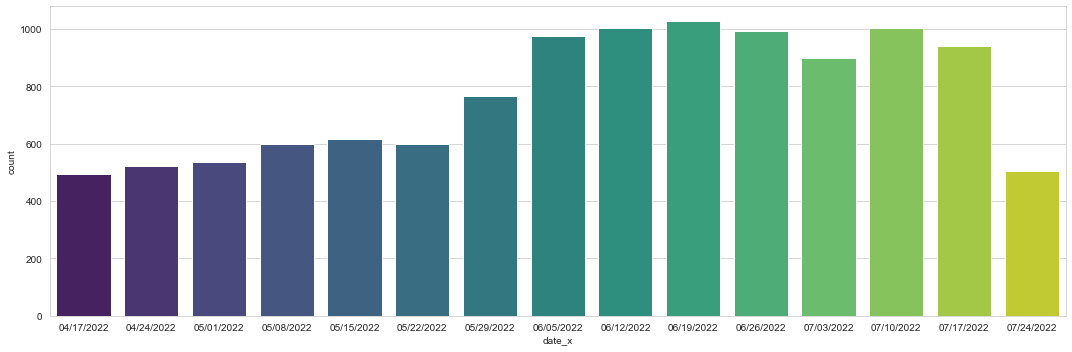

In [13]:
fig = plt.figure(figsize=(15, 5))

sns.countplot(x='date_x', data=fvpv, palette='viridis')
fig.tight_layout()

### How many of them were new to each Carnage?

The idea is to know how many NEW and OLD players we have each Carnage within the window of time that we are analyzing.

Generating the label is_old to understand if a player participated previously to that week. 

Because we have that each record is a player in a specfic week, so if he/she played previously to that week its going to be as 1 in other case 0.



In [14]:
def played_previously(df):
    df['is_old'] = 0 
    df_copy = df.to_dict('records')
    for r in df_copy:
        player = r['index']
        week = r['week_n']
        for r2 in df_copy:
            if (player == r2['index']) & (week > r2['week_n']):
                r['is_old'] = 1
    new_df = pd.DataFrame.from_dict(df_copy)
    return new_df

new_fvpv = played_previously(fvpv).copy()

'''
Improve perfomance if possible

import timeit
t = timeit.Timer('played_previously(df)', globals=globals())
time = t.timeit(1)
print('took %fs\n:'%(time, ))

took 11.486412s
'''

"\nImprove perfomance if possible\n\nimport timeit\nt = timeit.Timer('played_previously(df)', globals=globals())\ntime = t.timeit(1)\nprint('took %fs\n:'%(time, ))\n\ntook 11.486412s\n"

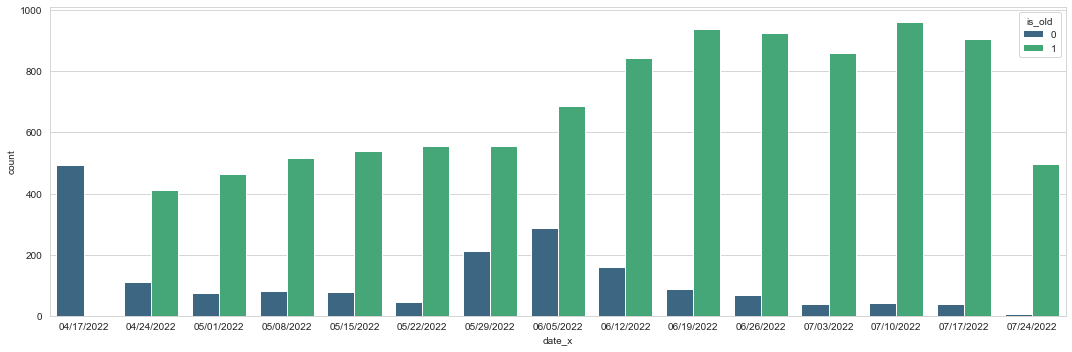

In [15]:
fig = plt.figure(figsize=(15, 5))

sns.countplot(x="date_x", data=new_fvpv, palette='viridis', hue='is_old')
fig.tight_layout()

In [16]:
# These players are gonna be famous in my analysis, bc they came really late into carnage. 
# (some of them could have played before tho, bc i dont have all the data but is an approx)

new_fvpv[(new_fvpv['date_x']=='07/24/2022') & (new_fvpv['is_old']==0)]

,index,wood_x,stone_x,iron_x,exp_x,grain_x,gold_x,date_x,week_n,string_x,...,b_stone,b_iron,b_exp,b_grain,b_gold,b_string,b_fish,b_moonstone,n_each_rss,is_old
11097,biggwb,0.0,0.0,0.0,0.0,0.0,0.0,07/24/2022,31,0.0,...,0,0,0,0,0,0,0,0,0,0
11129,Blinkin_chaos,0.0,0.0,0.0,0.0,0.0,0.0,07/24/2022,31,0.0,...,0,0,0,0,0,0,0,0,0,0
11259,Medske,0.0,0.0,0.0,0.0,0.0,0.0,07/24/2022,31,0.0,...,0,0,0,0,0,0,0,0,0,0
11306,c4b0rj4z,0.0,0.0,0.0,0.0,0.0,0.0,07/24/2022,31,0.0,...,0,0,0,0,0,0,0,0,0,0
11383,PolkaBee,0.0,0.0,0.0,0.0,0.0,0.0,07/24/2022,31,0.0,...,0,0,0,0,0,0,0,0,0,0
11433,nexus9290,0.0,0.0,0.0,0.0,0.0,0.0,07/24/2022,31,0.0,...,0,0,0,0,0,0,0,0,0,0


### How many session the players have been played?

In order to know if players have been played recurrently we need to calculate how many sessions they have participated. If we remember we have 1820 players that have been played so far, if we calculate to them how many session they have been participated we obtain that we have a significat amount of new players have been played 7 carnages, that is 1.221 players (67% of total players, or approximately 2/3) and the 1/3 of the players have been played more than 7 carnages. So we have a third of the total that are the old ones, and probably where we can discover more moonsamas.

<AxesSubplot:xlabel='date_x', ylabel='Count'>

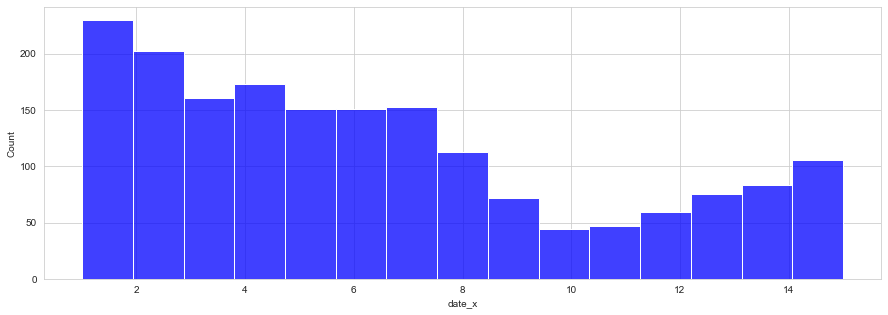

In [17]:
byPlayer = fvpv.groupby('index').count()
byPlayer = byPlayer.reset_index()
byPlayer.head()

fig = plt.figure(figsize=(15, 5))

sns.histplot(data=byPlayer, x="date_x", color='blue')

The 10% of players have been played all the carnages without failing, and we could say 30% of the players is we add people that failed no more than 3 times.

### How about mining?

Let's look close to the resources

In [72]:
rssByCarnage = fvpv.groupby(['date_x']).sum()[['gold_y','iron_y','wood_y','stone_y','exp_y','grain_y','string_y','fish_specimen_y','moonstone_y']]
rssByCarnage.reset_index()

,date_x,gold_y,iron_y,wood_y,stone_y,exp_y,grain_y,string_y,fish_specimen_y,moonstone_y
0,04/17/2022,2032.6,6333.2,9372.8,51157.4,188243.0,3434.4,0.0,0.0,0.0
1,04/24/2022,2059.8,6613.6,10698.0,52355.2,25953.8,6696.0,0.0,0.0,0.0
2,05/01/2022,1957.0,4404.8,9638.6,54319.2,23791.2,6351.2,0.0,0.0,0.0
3,05/08/2022,3097.2,7397.6,29320.2,56243.0,29863.4,0.0,161.0,0.0,0.0
4,05/15/2022,2997.8,7392.8,20442.2,59996.0,33081.2,0.0,242.4,0.0,0.0
5,05/22/2022,2431.4,6447.4,19473.8,50863.0,34656.2,0.0,216.8,10634.0,0.0
6,05/29/2022,3181.4,8789.2,24291.6,62729.0,45082.8,0.0,232.8,15077.0,0.0
7,06/05/2022,4322.0,11944.0,31329.6,82310.4,52962.4,0.0,247.2,19007.0,0.0
8,06/12/2022,6122.6,15220.4,33154.0,93268.4,57970.8,0.0,287.0,17795.0,0.0
9,06/19/2022,6233.4,14984.8,27385.8,89740.6,57147.6,0.0,240.6,13565.0,0.0


We see that stone, exp, wood, iron, gold, and fish are the common resources, in the other hand we have less common resources: grain, string, and moonstone. So if we calculate the total number of mined resources. (before gganbu)

In [63]:
rssByCarnage.sum()

gold_y               61692.0
iron_y              151612.0
wood_y              306445.4
stone_y            1005750.4
exp_y               784113.2
grain_y              16481.6
string_y              2507.2
fish_specimen_y      99187.0
moonstone_y           4616.6
dtype: float64

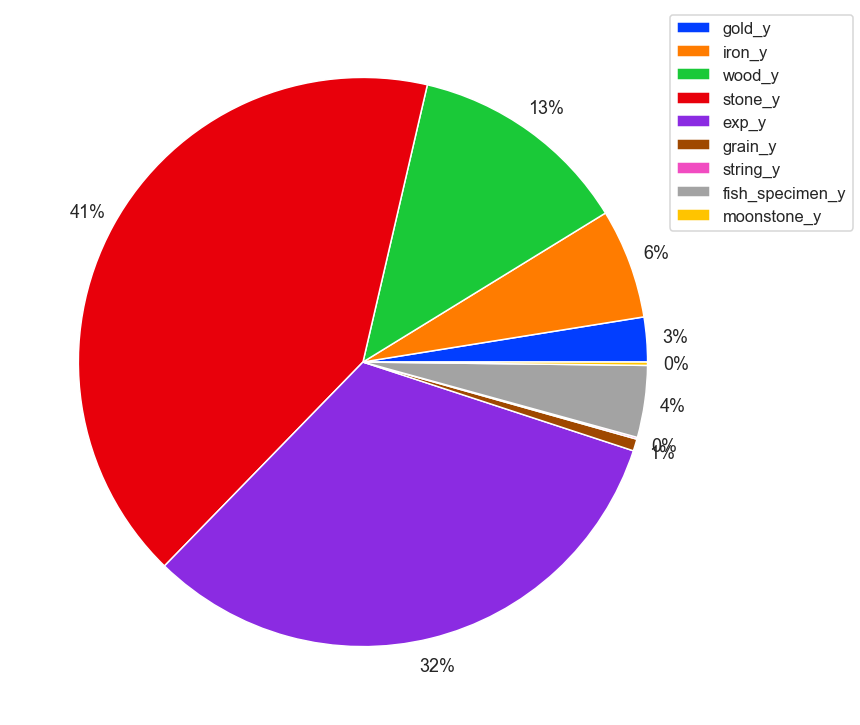

In [118]:
rss = rssByCarnage.sum()

fig = plt.figure(figsize=(12, 12))

palette_color = sns.color_palette('bright')
plt.pie(rss, colors=palette_color, autopct='%.0f%%', pctdistance=1.1)
plt.legend(rss.index, loc='upper right', bbox_to_anchor=(1.2,1))

plt.tight_layout()

#### Let's take a look to the top 5 mined resources

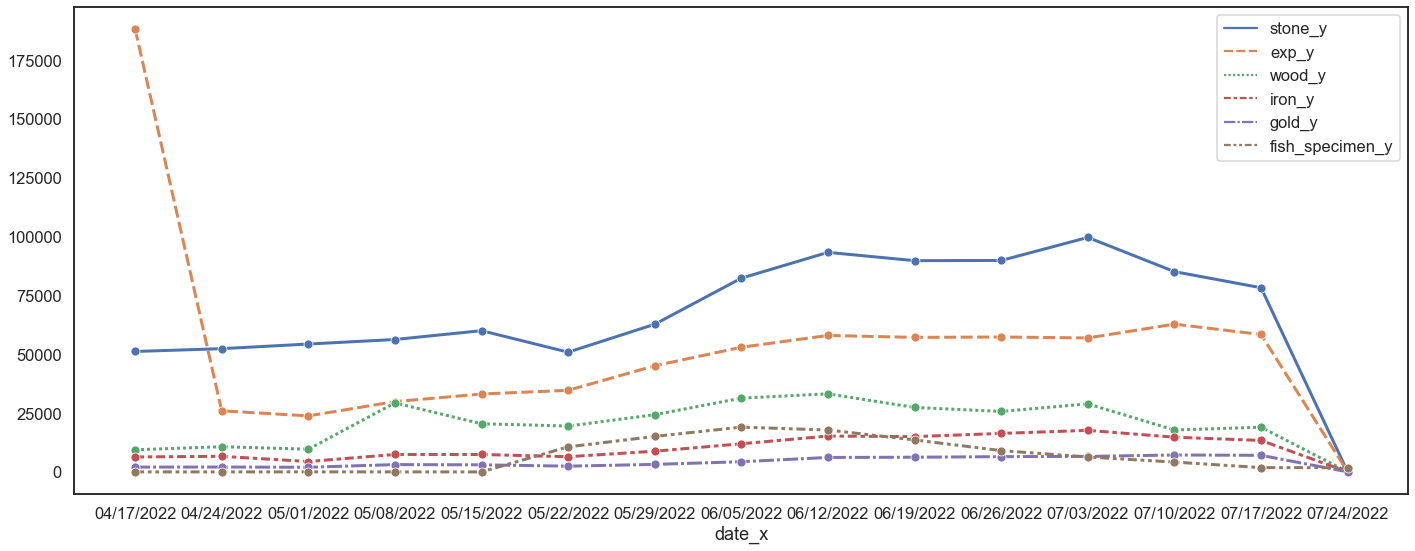

In [85]:
fig = plt.figure(figsize=(20, 8))
sns.lineplot(data=rssByCarnage[['stone_y','exp_y','wood_y','iron_y','gold_y','fish_specimen_y']], marker='o', lw=3)

plt.tight_layout()

#### Let's take a look to the less mined resources

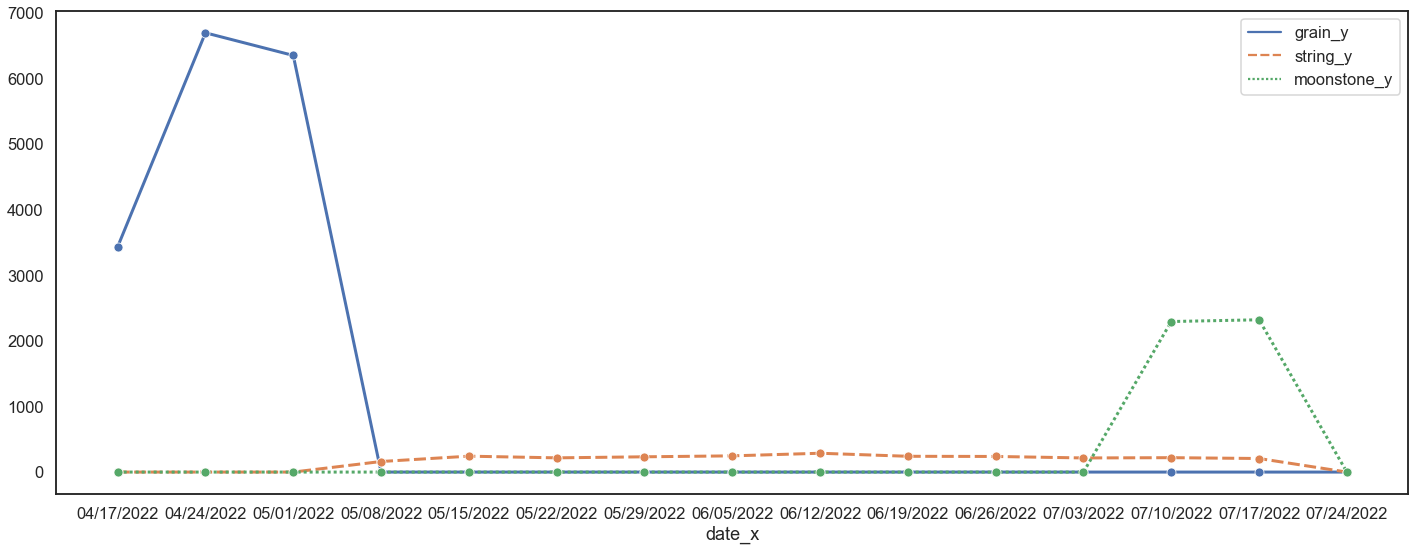

In [86]:
fig = plt.figure(figsize=(20, 8))
sns.lineplot(data=rssByCarnage[['grain_y','string_y','moonstone_y']], marker='o', lw=3)
plt.tight_layout()

We can notice that one the most common resources is stone. It's also one the primary resources to craft tools that work properly within the first minutes of the game. Also, we can think that players without expertise try to fill the invertory with stone because one technique could consist in stay safe in a cave/hole within the last minutes of carnage. 

There's a considerable amount of exp generated just for playing. We can't see how is that distribuited in this graph but we can think that most of the exp generated will be distribuited between players.

Wood, the third common resource, a super important resource at the beginning, and we can think that is way less mined than stone because players are more incline to mine in order to get valuable resources. Futhermore, we can think that the fact of just finding wood in the surface could implide a risk.

And now, the less common resources listed below:

- Iron
- Fish
- Gold
- Grain
- String
- Moonstone

### How about the Gganbu

The Gganbu was increasing during each Carnage with few exceptions. We can notice that we had a distribution of fish_specimen in 06/12/2022, that could mean that just in that carnage people collected more fish than was allowed and those extra fishes were distributed (this is just an idea)

In [126]:
gganbu = fvpv.groupby('date_x').sum().reset_index()[['date_x','gganbu_wood','gganbu_stone', 'gganbu_iron', 'gganbu_exp', 'gganbu_grain','gganbu_gold', 'gganbu_string', 'gganbu_fish', 'gganbu_moonstone']]
gganbu

,date_x,gganbu_wood,gganbu_stone,gganbu_iron,gganbu_exp,gganbu_grain,gganbu_gold,gganbu_string,gganbu_fish,gganbu_moonstone
0,04/17/2022,37491.20109,204629.59984,25332.79889,643.00000,13737.59937,8130.39889,0.00000,0.0,0.00000
1,04/24/2022,42792.00050,209420.79957,26454.40061,103046.39945,26784.00017,8239.19936,0.00000,0.0,0.00000
2,05/01/2022,38554.39946,217276.79926,17619.20023,94078.40025,25404.79941,7827.99959,0.00000,0.0,0.00000
3,05/08/2022,117280.80100,224971.99907,29590.40032,117671.99933,0.00000,12388.79911,644.00062,0.0,0.00000
4,05/15/2022,82025.93552,240738.66605,29664.19149,130206.95366,0.00000,12028.90870,972.64947,0.0,0.00000
5,05/22/2022,77895.19953,203452.00026,25789.60073,132891.59947,0.00000,9725.60018,867.20065,0.0,0.00000
6,05/29/2022,97166.39958,250915.99915,35156.79929,180331.19933,0.00000,12725.59941,931.19970,0.0,0.00000
7,06/05/2022,125318.40034,329241.60025,47775.99954,211849.59953,0.00000,17287.99920,988.79909,0.0,0.00000
8,06/12/2022,132878.99968,375546.60061,61184.59941,234675.20049,0.00000,24584.40021,1150.00038,1538.0,0.00000
9,06/19/2022,109543.19949,358962.40012,59939.20069,228590.40026,0.00000,24933.59947,962.40041,0.0,0.00000


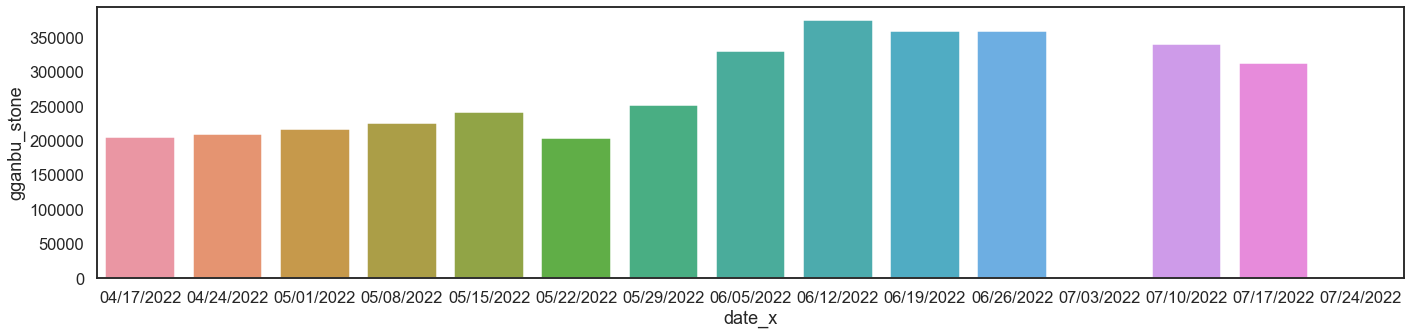

In [131]:
fig = plt.figure(figsize=(20, 5))
sns.barplot(data=gganbu, x='date_x', y='gganbu_stone')
fig.tight_layout()

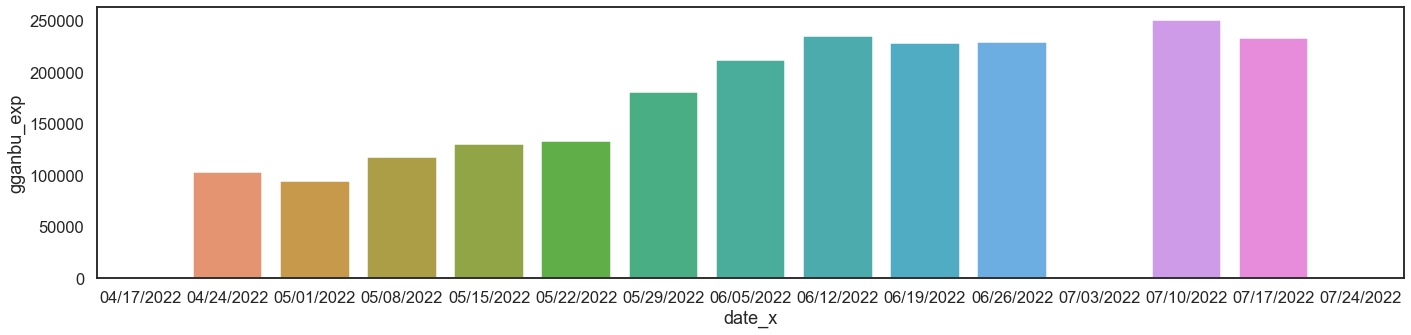

In [132]:
fig = plt.figure(figsize=(20, 5))
sns.barplot(data=gganbu, x='date_x', y='gganbu_exp')
fig.tight_layout()

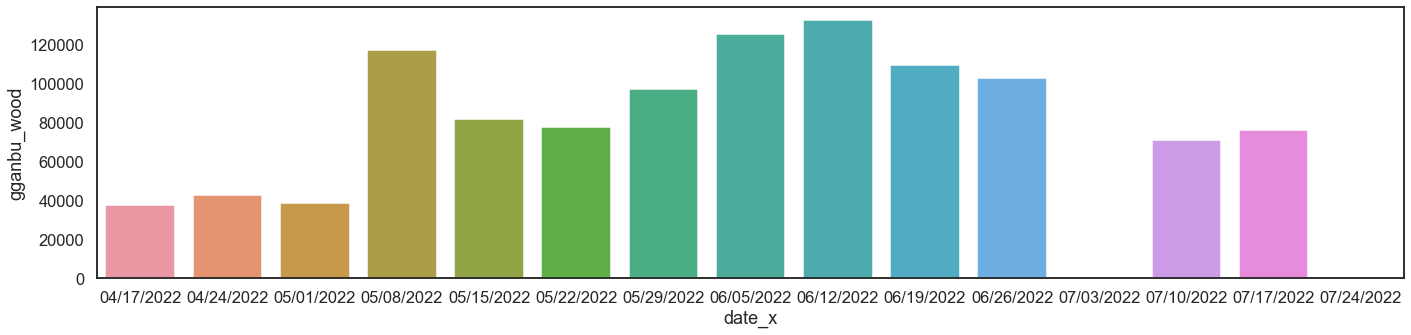

In [133]:
fig = plt.figure(figsize=(20, 5))
sns.barplot(data=gganbu, x='date_x', y='gganbu_wood')
fig.tight_layout()

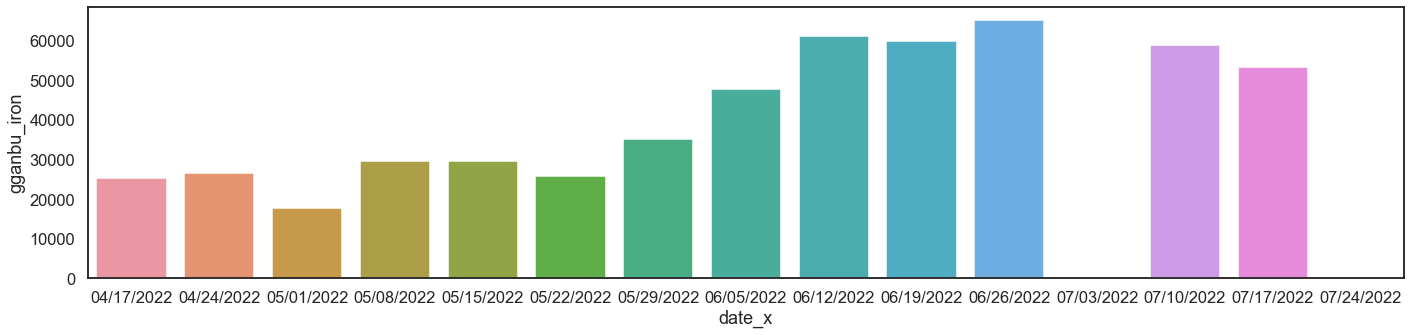

In [134]:
fig = plt.figure(figsize=(20, 5))
sns.barplot(data=gganbu, x='date_x', y='gganbu_iron')
fig.tight_layout()

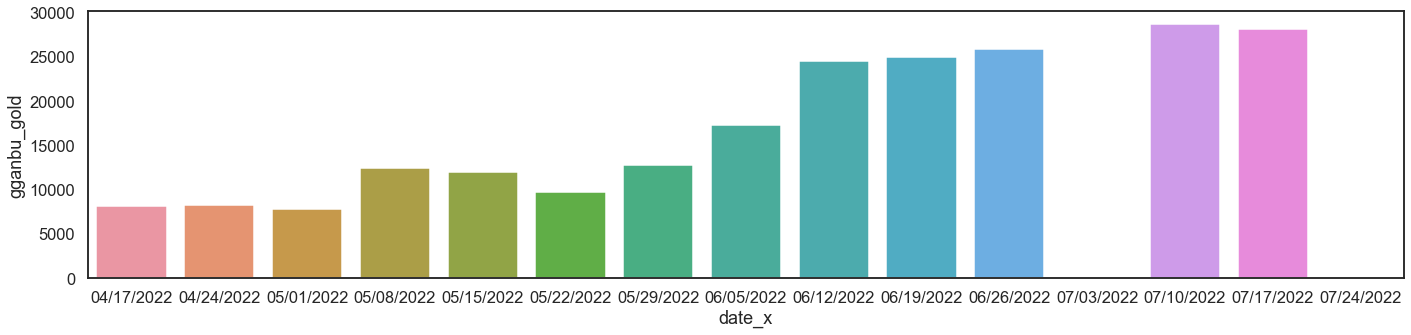

In [135]:
fig = plt.figure(figsize=(20, 5))
sns.barplot(data=gganbu, x='date_x', y='gganbu_gold')
fig.tight_layout()

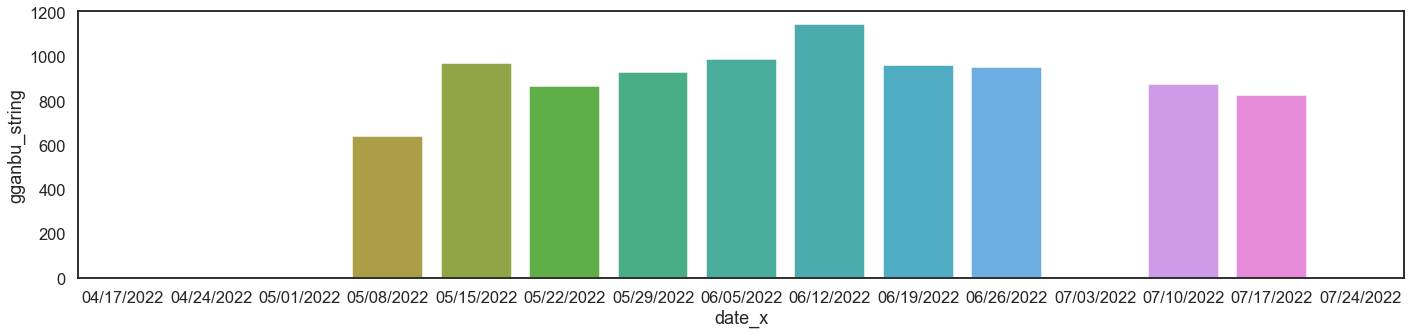

In [140]:
fig = plt.figure(figsize=(20, 5))
sns.barplot(data=gganbu, x='date_x', y='gganbu_string')
fig.tight_layout()

### b. Going deeper into the Player's Analysis

### c. Deeper Analysis of Resources Considering External Events

### d. Effects of having a no-reward session